In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\DELL\Downloads\\train.csv",encoding="utf-8")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
print("Missing values:\n", df.isnull().sum())


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [9]:
if "Loan_ID" in df.columns:
    df = df.drop(columns=["Loan_ID"])

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
lab = LabelEncoder()

for col in categorical_cols:
    df[col] = lab.fit_transform(df[col])

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [12]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Summary Statistics:
            Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000        

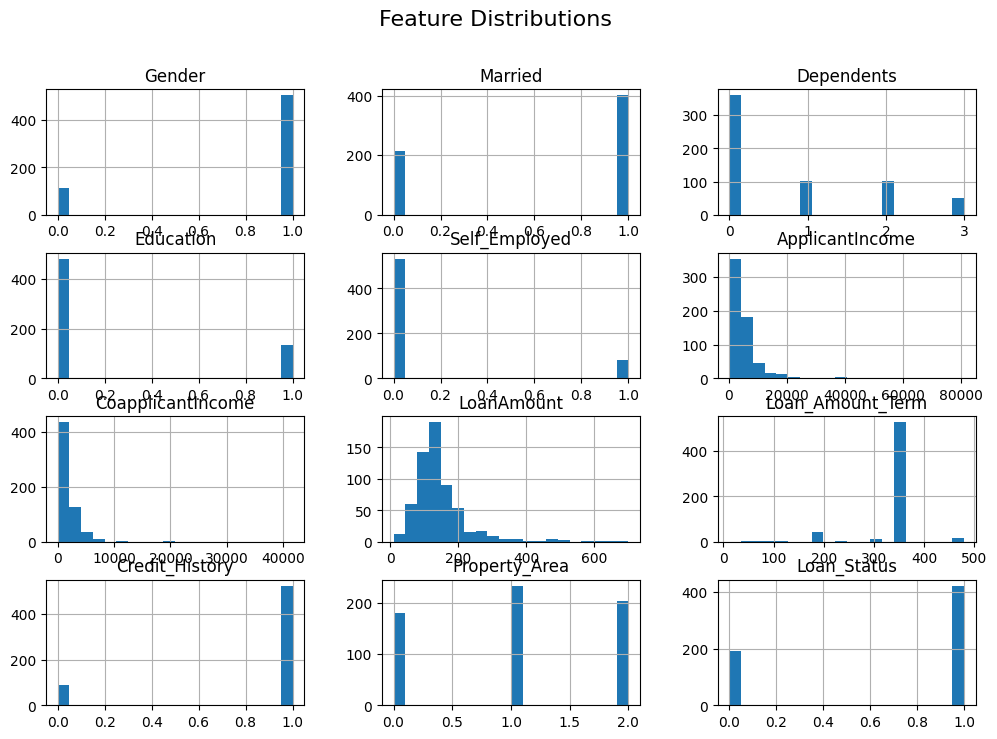

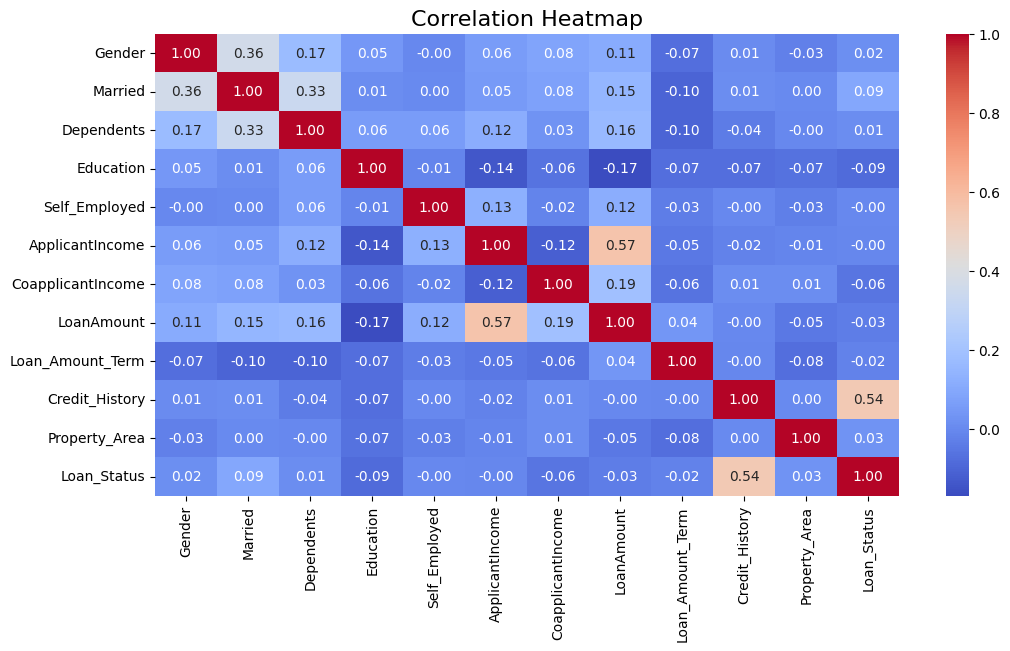

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Summary Statistics:\n", df.describe())

df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [15]:
X = df.drop(columns=["Loan_Status"])  
y = df["Loan_Status"]                 

In [16]:
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (614, 11)
Shape of y (target): (614,)


Class distribution:
 Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64


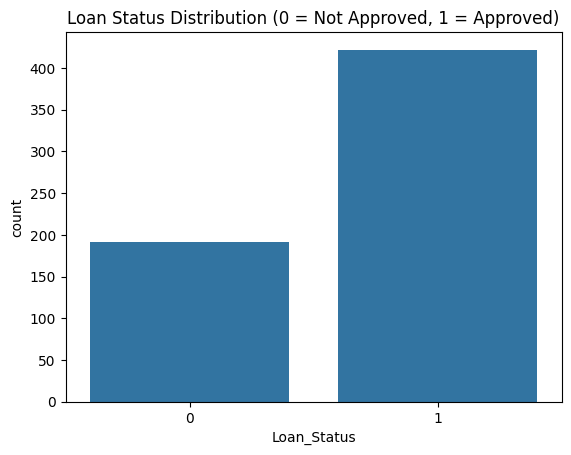

In [17]:
print("Class distribution:\n", y.value_counts(normalize=True))
sns.countplot(x=y)
plt.title("Loan Status Distribution (0 = Not Approved, 1 = Approved)")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Loan Evaluation")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Loan Evaluation
Accuracy : 0.8048780487804879
Precision: 0.8004288040236648
Recall   : 0.8048780487804879
F1 Score : 0.8017007756284459

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.84      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123


Confusion Matrix:
 [[24 14]
 [10 75]]


In [22]:
import numpy as np
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]})

coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])
coefficients = coefficients.sort_values(by="Abs_Coefficient", ascending=False)

print("Logistic Regression Coefficients:\n")
print(coefficients[["Feature", "Coefficient"]])

Logistic Regression Coefficients:

              Feature  Coefficient
9      Credit_History     2.992560
1             Married     0.565645
3           Education    -0.380796
0              Gender    -0.241305
4       Self_Employed    -0.130295
2          Dependents     0.077744
10      Property_Area     0.023691
7          LoanAmount    -0.000676
8    Loan_Amount_Term     0.000203
6   CoapplicantIncome    -0.000049
5     ApplicantIncome    -0.000002
